# Dynamics of a One-Shot Collective Risk Dilemma - Santos & Pacheco 2011 (PNAS)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import egttools as egt
import seaborn as sns

from matplotlib.ticker import AutoMinorLocator

## Infinite Populations - Replicator Dynamics

In [4]:
# from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games, )

In [5]:
# x = np.linspace(0, 1, num=Z+1, dtype=np.float64)

# gradient_function = lambda x: egt.analytical.replicator_equation(x, game.payoffs())
# gradients = calculate_gradients(np.array((x, 1 - x)).T, gradient_function)

## Finite Populations - Moran process with pairwise imitation (social learning)

In [6]:
# Parameters and evolver
beta = 5
Z = 50
N = 6
M = 3
b = 1
c = 0.1
pop_states = np.arange(0, Z + 1, 1)

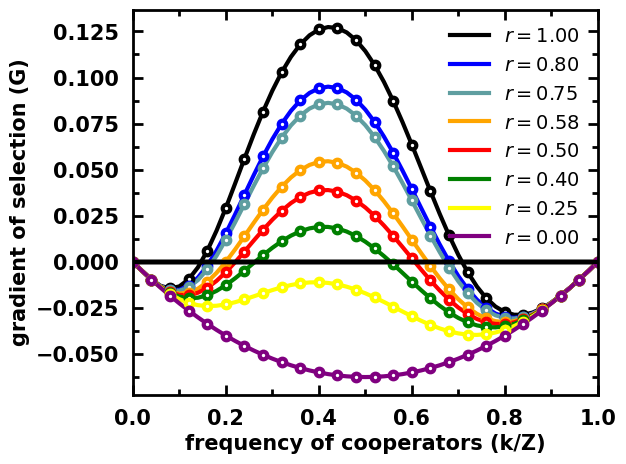

In [7]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red', 'green', 'yellow', 'purple']
risks = [1.0, 0.8, 0.75, 0.58, 0.5, 0.4, 0.25, 0.0]

for i, risk in enumerate(risks):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    gradients = np.array([[evolver.calculate_gradient_of_selection(beta, egt.sample_simplex(index, Z, 2))[1]]
                          for index in range(egt.calculate_nb_states(Z, 2))])
    egt.plotting.indicators.plot_gradients(gradients,  
                                       marker_facecolor='white',
                                       xlabel="frequency of cooperators (k/Z)", marker="o", 
                                           marker_size=30, marker_plot_freq=2, 
                                           linelabel="$r={:.2f}$".format(risk), 
                                           marker_edgecolor=colors[i], color=colors[i], ax=ax)

ax.legend(frameon=False, fontsize=14)